# Introduction

Welcome to the fifth lab. Last week we had a break from math-heavy assignments to allow you to catch up on the fundamentals and tools seen so far. Well, as far as learning Pandas could be considered a break, anyway. We will learn more of this library over the following weeks, I hope you will develop an appreciation for its use over time.  
_"You may find its methods disagreeable, but you can't avoid appreciating the results"_ (cit.)

## Grouping in Pandas

It is time to introduce some of the math applications of Pandas DataFrame and Series, and to the unfriendly-but-oh-so-useful `groupby()`.

From now on we will be using Pandas containers for our data, even directly for the math calculation. Remember that they wrap around Numpy arrays (and you know how to use those now) while giving convenient indexing and extra capabilities. No need to e.g. split the points based on their class into a `dict` as we did for LDA: we can simply _group_ data by label, then all operations will work on the whole feature arrays, and run for all classes at once (and using the underlying, faster C implementation).

Main hint: simply treat a DataFrame just like you would a multi-dimensional Numpy array. Think of it as a matrix, or higher dimensional tensor, while a Pandas Series is a one-dimensional Numpy array. In either case, function calls will be _broadcasted_ to its elements, which means they will run independently on each element and their results will be aggregated back in a data structure of the same type (list, Series or DataFrame).

We will use `groupby()` extensively, and it is typically slow to grasp at first, but your code will be legible and you will need (almost) no more `for` loops nor `dict`s. 
Careful because the method returns a special [`GroupBy` object](https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html) that is somehow unwieldy: it removes a feature, adds a dimension (the grouping), and does not print directly. Read the last sentence a couple of times _after_ playing around with `groupby()` and it will slowly start to make sense.

Try to follow calls to `groupby()` with a `describe()` initially, to really see its application; also print the `groups` for an intuition on how it works. Basically a `dict` from each element of the group (e.g. the classes) to the indices of the corresponding rows. With LDA we did something similar, but it was from the classes to the actual data (less efficient).  
A `GroupBy` object is just an implicit description on how to split/group the data, and now any operation you call on it (such as say `+1`) will return multiple results, _one per group_ instead of just one. Automated mapping, aka broadcasting. Go ahead and give it a try, understanding this is necessary before moving on to the next questions, and it's easier if you play with it yourself.  
The trick that did it for me was to try and ignore its output *per se*, and instead just call functions on the output such as `describe()`.

From this point on, it is important that you need to start thinking of the dataset as a whole, single, high-dimensional entity, and your exploration as selecting and slicing this object from different perspectives as if you were "floating around it in space" rather than being stuck to "one row at a time". When using the DataFrame for math, just remember that you are manipulating multiple variables at the same time: treat it like a special Numpy data structure and everything should be intuitive.

In [1]:
# Let me hit ctrl+c ctrl+v for you one last time
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set(rc={'figure.figsize':(8,6)}, style="whitegrid")

/Users/kimanh/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


# 1. Fundamentals

This time we start strong with an example that is simple but longer. Take your time to read and understand each part, follow the suggestions, and it should unravel without much trouble.

#### 1.1 **[4pt]** You want to calculate the reliability of a weather forecast service. In the current season, you get rain on 25% of the days. You know that 10% of the time they forecast rain and it does not rain. You also know that 5% of the time they forecast good weather and they are wrong. Using Bayes' rule, calculate by hand the probability that one day it is going to rain given that they earlier forecasted rain.

I suggest you proceed as follows: (i) fill the data you know in an events probability [table](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables), as seen in the lecture; (ii) your events are whether it is going to rain or not, and whether the forecast predicted rain or not; (iii) remember that probabilities sum to a constant over all possible events, so fill in the blanks in (a copy of) the table; (iv) state very clearly what are the posterior, prior, likelihood and evidence; (v) only assemble your Bayes' equation and calculate the numbers, once you are certain of your components.

|               | Rain          | Not Rain | Sum     |       
| ------------- |:-------------:| --------:|--------:|
| F Rain        |20%            | 10%      | 30%     |
| F Not Rain    | 5%            | 65%      | 70%     |
|        Sum    |25%            | 75%      |

Let call R the event of *having rain*, and F the event of *forecasting rain*. We want to compute the probability of having rain given the forecast of rain, i.e P(R/F)

We know that:

* 10% of the times they forecast rain and it does not rain
* 5% of the times they forecast good weather (not rain) and it does rain
* 25% of the days get rain (A prior)


From Bayes theorem, the posterior (the probability of having rain given forecast of rain) is given as following:

$P(R|F) = \frac{P(F|R).P(R)}{P(F)}$

where:
* The prior $P(R)$ = 25%
* The likelihood $P(F|R) = P(F,R)/P(R) = 20/25$
* The evidence $P(F) = 30$

So we can calculate the posterior using Bayes:
$P(R|F) = \frac{P(F|R).P(R)}{P(F)} = \frac{20/25.25}{30} = 66.6%$

Alternatively, looking at the table, we also could just use simplified version:

$P(R|F) = \frac{P(R,F)}{P(F)} = \frac{20}{30} = 66.6%$

#### 1.2 **[1pt]** Explain $\hat{y} = \text{arg}\!\max_{y \in Y}\big\{P(y \,|\, x)\big\}$ .

Naive Bayes predicts the label/class of an input x as: the class that have the highest conditional probability of the hypothesis (class y is the correct one), given that we observe x.

In practie, this means that NB classification computes the probabilities for each class to have generated x, then returns the class corresponding to the highest probability - which is the exact same concept we saw behind the LDA. What different is how the classes are modeled.

#### 1.3 **[1pt]** How does NB differ from LDA in regards to the covariance of the distributions used to model the data?


As mentioned before, what different between NB and LDA is how classes are modeled. LDA - arbitrage probabilistic model # NB - independently one-dimensional models that are flexible in the choice - that could be Gaussian, binomial,.. etc.

Regards to the covariance of the distributions used to model the data:
* LDA maintains a single, dense covariance matrix constructed from all features of all points of all classes.
* NB instead maintains a different distribution for each feature for each class. Each class has its own certain features of $\mu_i \in R$ and $\sigma_i>0$

This means NB does not maintain covariance between features, but has more flexibility on modeling more precisely each feature and distinguish the variance of each feature in each class independently.

# 2. Model Selection for Naïve Bayes

#### 2.1 **[3pt]** Load the `tips` dataset from Seaborn  (into a Pandas DataFrame). Which distribution would you use to model each of the features in the dataset? Explain your choices.

You load the dataset the same way you did for `iris` before. Obviously you need to study it to be able to answer. You should find useful to consider (i) the list of dtypes for each feature, (ii) the number of unique values for each of the categorical features, (iii) you can use the `pairplot` to quickly inspect the data: can you do better than a simple Gaussian if there are multiple peaks or asymmetry in the distribution of the real-valued features?  
The code cell below is to hold your analysis, while the real answer + motivations go in the Markdown cell just underneath.

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]
total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object
sex       2
smoker    2
day       4
time      2
dtype: int64


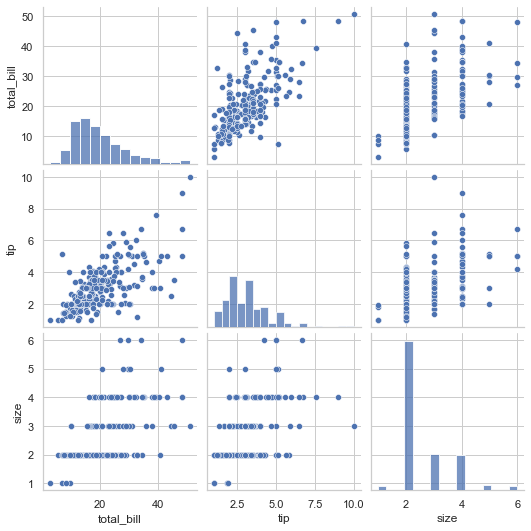

In [13]:
import seaborn as sns
df = sns.load_dataset('tips') 
print(df)

print(df.dtypes)
print(df.loc[:, df.dtypes=='category']. nunique()) #check number of unique values in categorical variables

sns.pairplot(data= df) #quickly inspect the data using pairplot

By looking over the pairplot, we observe that `total_bill, tip, size` are numerical values and seems to be single-peaked (they are all `float64` though I would expect any negative or high precision decimals to be defects), Gaussians or to be more precise Mixture of Gaussians with assymetric could be used to model its distributions (probably g=2 could suffice).\
For `sex, smoker, time` I can use Bernoulli distributions since they are all binary features. For `day` categorical with 4 values, Binomial distribution could fit.

# 3. Naïve Bayes Classification

Let's write a Naïve Bayes classifier from scratch. We will work with the `iris` dataset (again, from Seaborn) since we know already the data. All features are continuous: for simplicity we can use simple Gaussians, but we should expect some misclassification.

From now on let's also introduce the train-test split so we can start verifying our model's performance the right way. Just use `train` for your answer instead of `df`, and leave `test` for the end.

In [40]:
df = sns.load_dataset('iris')

from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2) # 80-20 split

#USE train FOR traning the model INSTEAD OF df
print(train)
print(test)

     sepal_length  sepal_width  petal_length  petal_width     species
97            6.2          2.9           4.3          1.3  versicolor
86            6.7          3.1           4.7          1.5  versicolor
141           6.9          3.1           5.1          2.3   virginica
60            5.0          2.0           3.5          1.0  versicolor
102           7.1          3.0           5.9          2.1   virginica
..            ...          ...           ...          ...         ...
119           6.0          2.2           5.0          1.5   virginica
6             4.6          3.4           1.4          0.3      setosa
94            5.6          2.7           4.2          1.3  versicolor
30            4.8          3.1           1.6          0.2      setosa
39            5.1          3.4           1.5          0.2      setosa

[120 rows x 5 columns]
     sepal_length  sepal_width  petal_length  petal_width     species
139           6.9          3.1           5.4          2.1   virgin

#### 3.1 **[2pt]** Compute the priors for the three classes of the Iris dataset using the Pandas DataFrame, _in a single line of code_ and without using loops (`for`, `while`, etc.).

One-liners are typically bad practice (remember: readability first!), but here I need to force you to learn this new tool and stop writing `for` loops, since they will not scale from now on.  

Careful as many tutorials online (such as [this one](https://chrisalbon.com/machine_learning/naive_bayes/naive_bayes_classifier_from_scratch/) will explicitly select the class and run the same calculation multiple times (and in multiple lines). This approach **does not scale** to problems with 100 or 10'000 classes: learn to use `groupby()` instead!  
_[Think: this course should make you confident enough to be the one writing the tutorials, and hopefully of much better quality!]_

As a reference, you will need to (i) group the dataframe by species, (ii) select only the grouped elements (returning a Series), (iii) run the Numpy-backed `count()`, (iv) divide by the total number of elements. If you get lost on the `groupby`, try this: `groupby(feature_name)[feature_name]`.

In [23]:
priors = train.groupby('species')['species'].count()/len(train)
priors

species
setosa        0.333333
versicolor    0.341667
virginica     0.325000
Name: species, dtype: float64

#### 3.2 **[1pt]** Compute the means and the standard deviations for each feature and for each class of the Iris dataset using the Pandas DataFrame (one line of code each).

As a reference, you should obtain 12 means and 12 standard deviations. Again, the use of `groupby` followed by Numpy's functions will take literally 2 lines and no loops. Remember to use the `train` data!

In [28]:
means = train.groupby('species').mean()
stds = train.groupby('species').std()
[means, '', stds]

[            sepal_length  sepal_width  petal_length  petal_width
 species                                                         
 setosa          5.002500     3.445000      1.455000     0.252500
 versicolor      5.939024     2.746341      4.260976     1.321951
 virginica       6.564103     2.964103      5.528205     2.023077,
 '',
             sepal_length  sepal_width  petal_length  petal_width
 species                                                         
 setosa          0.349716     0.407588      0.172389     0.113199
 versicolor      0.535667     0.310723      0.496930     0.204343
 virginica       0.685752     0.339882      0.570295     0.276692]

Here is a freebie to save you some debugging time: the (stunted) equation for the Gaussian probability. Stunted in the sense that, since it is only used to maximize the class probability, parts that do not depend on the class have been dropped (as usual). It requires you to define first the variables `means` and `stds` from the previous question (both $(3\times4)$ DataFrames).

If you really want to understand what is going on (especially with Pandas), I challenge you to comment it out, pull the slides, and write your own. You did something very close for LDA, feel free to review your code. You don't need it to look identical as long as it does the same job.

Remember that **Naïve Bayes computes the class likelihood as a product of the independent probabilities for each feature**: this is done by the `product()` on the columns. If you remove that, you should have 12 values (give it a try).

When passing a line of input to `likelihood` be careful to remove the last column (the `species`) as in the example below (in our previous calculations this was done by the `groupby()`, which made a new dimension out of it).

Also something that can be important: sometimes `iloc[]` converts the type of the data slice, so you can have errors because a function cannot be broadcasted. In that case, remember that calling `.astype('float')` will force the dtype to `float` and address some of these errors. This is not the most elegant solution, I will leave it to you to find a better one ;)

In [43]:
#class likelihood:
likelihood = lambda x: (np.exp(-(x-means)**2/(2*stds**2))/stds).product(axis=1) #product column by column
#passing train set into likelihood function, remove 'species' column:
likelihood(train.iloc[0, :-1].astype('float'))

species
setosa        7.669496e-79
versicolor    4.608784e+01
virginica     7.505037e-02
dtype: float64

#### 3.3 **[1pt]** Write a Python function that takes a single line of input $x$ and returns the prediction of its class $\hat{y}$. Run it on the same data point as the example cell above. Is the prediction the same as you would have from the cell above? Why / why not?

As a sanity check: it should take a row as input (without labels, as for `likelihood` above) and return the string found in the `index` of the max value (the documentation is your friend).

In [44]:
#Naive Bayes argmax{P(y|x)} with the posterior P(y|x) = (prior.likelihood)/evidence; we drop the evidence
class_predict = lambda x: (priors*likelihood(x)).idxmax() 

class_predict(test.iloc[0, :-1]. astype('float'))  #predict the first species in the test set
    

'virginica'

The correct first label in the test set is `virginica`. If we look at the likelihood, it points to `versicolor` since it does not take into account the prior. Once the prior is taken into account in the class_predict function, the prediction becomes instead `virginica`. Remind that the output and interpretation could change due to each time of running the codes, it results to different trainning and testing sets. 

#### 3.4 **[2pt]** Compute $\hat{y}$ for all points in the `test` dataset, in one line and without using Python loops (`for`, `while`, etc.). Compare it with the correct label $y$ and print the number of misclassified points.

And here is how you use the test set: after the training on the train set is complete, you evaluate its performance on data it was not trained on. This is absolutely **crucial** in machine learning. We will use this process from now on, and using the wrong dataset (either for training or testing) will be considered a major error (so careful with typos! Double-check every time!). If you wonder why so strict, check again the 4th lecture and ask yourself what are the consequences of getting it wrong in a work or research setting (and feel free to discuss on Moodle).

Again, no loops: you need both to drop the last column and then to apply the function to the rows. For example: `train.iloc[:, :-1].apply(my_predict_fn, axis=1)`. Can you make it look nicer/more readable?

Remember you can count the number of `True` values in a numpy array simply by calling `sum()` on it.

In [46]:
preds= test.iloc[:,:-1].apply(class_predict, axis=1)
print(f"Misclassified: {(preds != test['species']).sum()}/{len(preds)} points")

Misclassified: 2/30 points


#### 3.5 **[1pt]** Why did we not compute (nor need) the _evidence_ for predicting the input's class?

Because the evidence does not depend on the class therefore can be dropped from the argmax

#### 3.6 **[2pt]** Train a scikit-learn Naïve Bayes Gaussian classifier on the Iris train data using a Pandas Dataframe, and print the number of misclassified points on the test data.

Remember that:
- Now that we have a bit more experience with Pandas we can learn how to pass the DataFrames directly to scikit-learn.
- The training data should always be 2D (i.e. DataFrame) and not have the label (`train.iloc[:,:-1]`, do you know what each `:` stands for?).
- The labels should always be 1D (i.e. Series) and numerical. Rather than doing the conversion manually, you should convert the feature to categorical and then use its codes (`train['species'].astype('category').cat.codes`).
- Mistakenly testing on the train set will fail the question, as will comparing the prediction against the train set labels (hint hint).
- You will probably get better results with scikit-learn because it uses multivariate Gaussians and improved estimators (check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)).

In [51]:
from sklearn.naive_bayes import GaussianNB

x_train = train.iloc[:, :-1]
y_train = train['species'].astype('category').cat.codes   #convert the feature to categorical and cat codes

x_test = test.iloc[:, :-1]
y_test = test['species'].astype('category').cat.codes

#Scikit-learn uses Multivariate Gaussians and improved estimators:

trained = GaussianNB().fit(x_train, y_train)
y_preds = trained.predict(x_test)
print(f"Misclassified: {(y_preds != y_test).sum()}/{len(y_preds)} points")

Misclassified: 2/30 points


# At the end of the exercise

Bonus question with no points! Answering this will have no influence on your scoring, not at the assignment and not towards the exam score -- really feel free to ignore it with no consequence. But solving it will reward you with skills that will make the next lectures easier, give you real applications, and will be good practice towards the exam.

The solution for this questions will not be included in the regular lab solutions pdf, but you are welcome to open a discussion on the Moodle: we will support your addressing it, and you may meet other students that choose to solve this, and find a teammate for the next assignment that is willing to do things for fun and not only for score :)

#### BONUS **[ZERO pt]** Do a bit of independent research, and propose below the simplest example you can, to make evident how the frequentist and Bayesian approaches are different.

I advise against blind copy+paste from the Internet in this case, I have seen so many incorrect opinions and tutorials over the years it is frankly ridiculous. I suggest you rather argue a bit on the Moodle about the approaches themselves, so you can make sure your example is correct.

A good intro: [[link]](https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/readings/MIT18_05S14_Reading20.pdf).

#### BONUS **[ZERO pt]** Train a Gaussian NB (either your code or scikit-learn) on the full Iris dataset (no train-test split) and check the misclassifications. Train the same on the 80% training data, then check and aggregate misclassifications both on the train and test datasets. You will probably get the same number of total errors regardless of whether you trained on 80% or 100% of the data. Can you explain why? The reason was mentioned in the last lecture. Feel free to play with different splits until you find how low can you go with the training before increasing the number of errors. Use the term `statistically representative` in your explanation.

### Final considerations

- This is the first core ML method we are covering in the course. As you see it expects you to know quite a lot of concepts before we can really discuss its workings.
- On the other hand, you now already own most of the glossary and knowledge needed, so you only need to put it all together.
- This is also your first method capable of *nonlinear classification*. Notice how LDA used nonlinear models for the data (Gaussian clusters) but still relied to linear separation boundaries (remember that we obtained those weirdly complicated equations for $m$ and $q$?) As it can work with multiple classes and different types of distributions (think Mixture of Gaussians), the division boundary is not a line anymore.
- In the next two lectures we will start learning about one of the bigger classic ML tools still state-of-the-art today: the Support Vector Machine, and its infamous Kernel Trick. We are reaching the "cruise speed" of complexity for the course, it will not increase in complexity for more than another couple of lectures, then we will pretty much stay on that level until the exam. Keep up both with the lectures and exercises and you should have no trouble. Good luck!